# Analyis of e-commerce datasets - matplotlib & seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load cleaned dataset

In [4]:
df = pd.read_csv('ecommerce_data_cleaned.csv')

ensure correct data types

In [82]:
print("Loaded Cleaned Dataset:")
print(df.head())

Loaded Cleaned Dataset:
   order_id customer_name product_name order_date  quantity   price  \
0      1001      John Doe       Laptop 2023-10-01         1  999.99   
1      1002    Jane Smith        Phone 2023-10-02         2  599.99   
2      1003       Unknown       Tablet 2023-10-03         2  299.99   
3      1004   Alice Brown   Headphones 2023-01-01         3  299.99   
4      1005    Bob Wilson        Mouse 2023-10-05         0   19.99   

            customer_email  total_revenue year_month  
0         john@example.com         999.99    2023-10  
1   jane.smith@example.com        1199.98    2023-10  
2                   alice@         599.98    2023-10  
3  alice.brown@example.com         899.97    2023-01  
4     no_email@example.com           0.00    2023-10  


Analysis 1 - Total Revenue Calculation
//Calculate total revenue (price * quantity for each row, then sum)

In [47]:
df['total_revenue'] = df['price'] * df['quantity']
total_revenue = df['total_revenue'].sum()
print(f"\nTotal_Revenue: ${total_revenue:.2f}")


Total_Revenue: $4859.89


Analysis 2 - Top Products by Sales Volume
//Group by product_name and sum the quantity

In [16]:
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
print("\nTop Product by Sales Volume")
print(top_products)


Top Product by Sales Volume
product_name
Headphones    3
Keyboard      2
Laptop        2
Phone         2
Tablet        2
Mouse         0
Name: quantity, dtype: int64


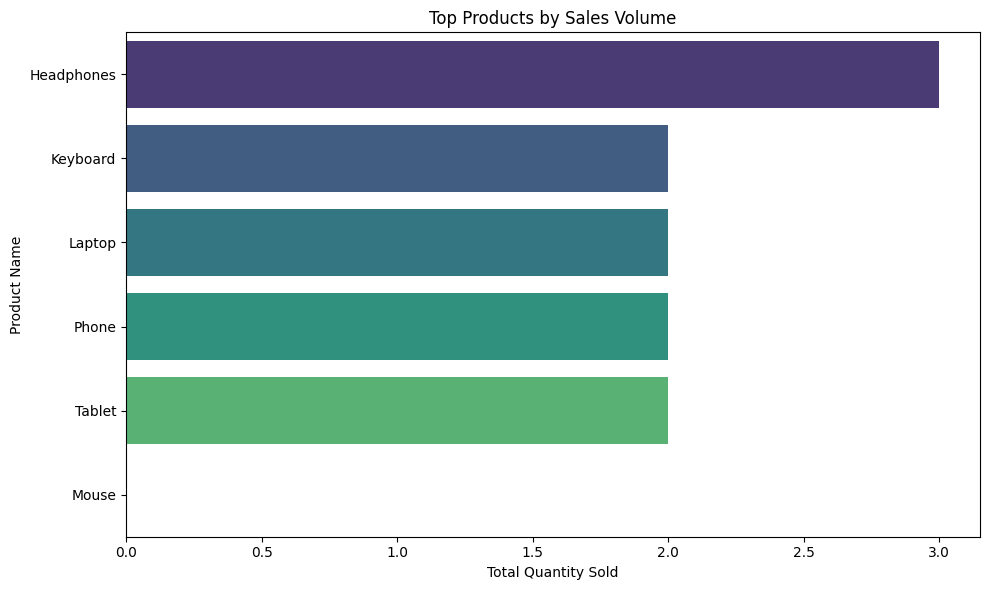

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top Products by Sales Volume')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Analysis 3 - Customer Purchase Patterns
// Group by customer_name and count the number of orders

In [29]:
customer_orders = df.groupby('customer_name')['order_id'].count().sort_values(ascending=False)
print("\nCustomer Purchase Patterns (Number of Order per Customer):")
print(customer_orders)


Customer Purchase Patterns (Number of Order per Customer):
customer_name
Unknown        2
Alice Brown    1
Bob Wilson     1
Emma Davis     1
Jane Smith     1
John Doe       1
Name: order_id, dtype: int64


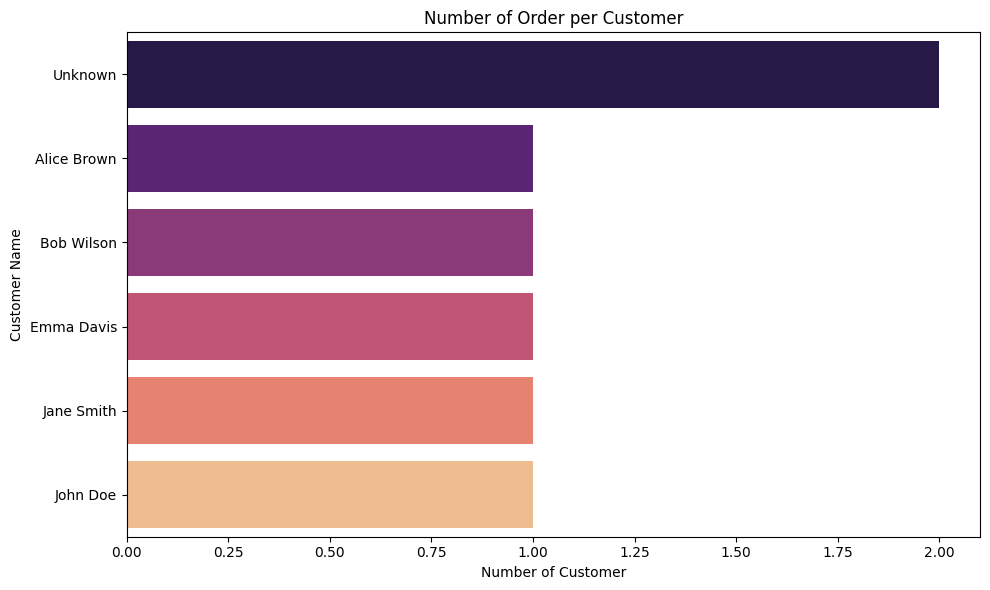

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_orders.values, y=customer_orders.index, hue=customer_orders.index, palette='magma', legend=False)
plt.title('Number of Order per Customer')
plt.xlabel('Number of Customer')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

Analysis 4 - Order Trends Over Time
/ Convert string to datetime
/ Extract year and month from order_date
/ Groupby year_month and count orders

In [64]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.to_period('M')
order_trends = df.groupby('year_month').size()
print("\nOrder Trends Over Time (Order per Month):")
print(order_trends)


Order Trends Over Time (Order per Month):
year_month
2023-01    1
2023-10    6
Freq: M, dtype: int64


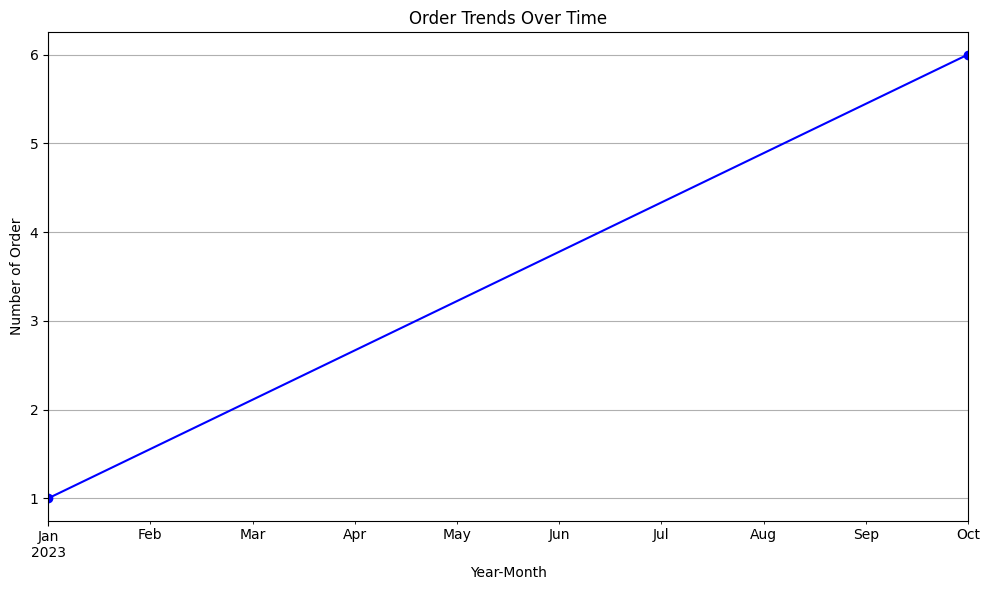

In [78]:
plt.figure(figsize=(10, 6))
order_trends.plot(kind='line', marker='o', color='b')
plt.title('Order Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Order')
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis 5 - Average Order Value
// Calculate average order value (total_revenue per order)

In [79]:
avg_order_value = df['total_revenue'].mean()
print(f"\nAverage Order Value: ${avg_order_value:.2f}")


Average Order Value: $694.27


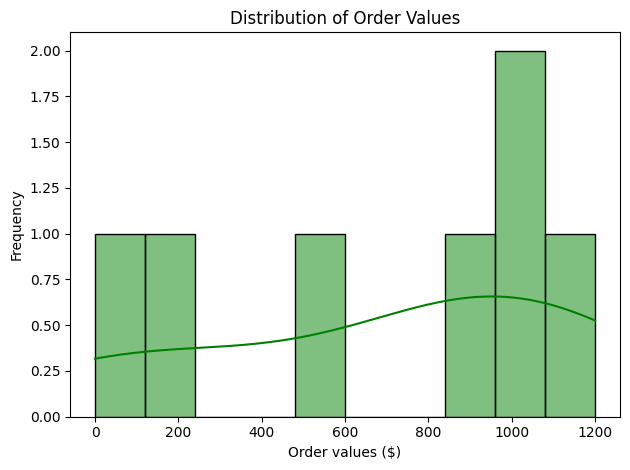

In [80]:
plt.Figure(figsize=(10, 6))
sns.histplot(df['total_revenue'], bins=10, kde=True, color='green')
plt.title('Distribution of Order Values')
plt.xlabel('Order values ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

save the result

In [81]:
df.to_csv('ecommerce_data_analyzed.csv', index=False)
print("\nDatasets with analysis results saved as 'ecommerce_data_analyzed.csv'")


Datasets with analysis results saved as 'ecommerce_data_analyzed.csv'
